In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
data=pd.read_csv('beer-servings.csv')

In [108]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [109]:
data = pd.read_csv('beer-servings.csv',index_col='Unnamed: 0')

In [110]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [111]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [112]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median())

In [113]:
data['beer_servings'].isna().sum()

0

In [114]:
for i in ['spirit_servings', 'wine_servings','total_litres_of_pure_alcohol']:
  data[i]=data[i].fillna(data[i].median())

In [115]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

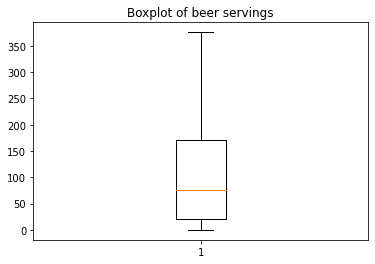

In [116]:
plt.boxplot(data['beer_servings'])
plt.title('Boxplot of beer servings')
plt.show()

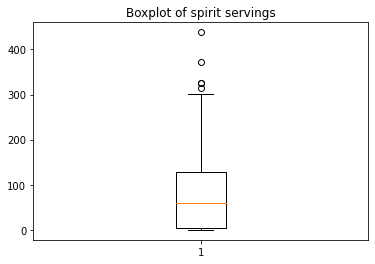

In [117]:
plt.boxplot(data['spirit_servings'])
plt.title('Boxplot of spirit servings')
plt.show()

In [118]:
Q1=np.percentile(data['spirit_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['spirit_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['spirit_servings'],75,interpolation='midpoint')

In [119]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [120]:
IQR = Q3-Q1
print(IQR)

123.0


In [121]:
low_lim = Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [122]:
print(low_lim)
print(up_lim)

-179.5
312.5


In [123]:
outliers = []
for x in data['spirit_servings']:
  if(x>up_lim) or (x<low_lim):
    outliers.append(x)

In [124]:
outliers

[373.0, 438.0, 326.0, 326.0, 315.0]

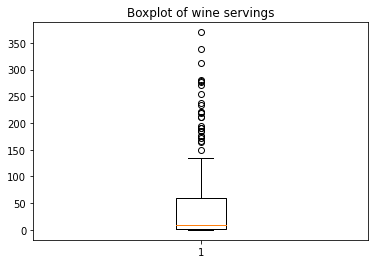

In [125]:
plt.boxplot(data['wine_servings'])
plt.title('Boxplot of wine servings')
plt.show()

In [126]:
Q1=np.percentile(data['wine_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['wine_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['wine_servings'],75,interpolation='midpoint')

In [127]:
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
59.0


In [128]:
IQR=Q3-Q1
print(IQR)

58.0


In [129]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [130]:
print(low_lim)
print(up_lim)

-86.0
146.0


In [131]:
outliers = []
for x in data['spirit_servings']:
  if(x>up_lim) or (x<low_lim):
    outliers.append(x)

In [132]:
outliers

[179.0,
 176.0,
 173.0,
 373.0,
 173.0,
 252.0,
 192.0,
 254.0,
 154.0,
 170.0,
 286.0,
 147.0,
 194.0,
 151.0,
 438.0,
 302.0,
 326.0,
 215.0,
 202.0,
 246.0,
 216.0,
 152.0,
 244.0,
 189.0,
 200.0,
 160.0,
 186.0,
 215.0,
 226.0,
 326.0,
 205.0,
 315.0,
 221.0,
 293.0,
 157.0,
 178.0,
 258.0,
 156.0,
 237.0,
 158.0]

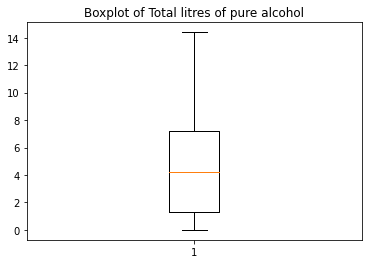

In [133]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('Boxplot of Total litres of pure alcohol')
plt.show()